In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from the CSV file
wanted_plots = ["Sensitivity", "Specificity", "Precision", "Accuracy", "F1 Score"]

df = pd.read_csv("confusion_matrices_condensed.csv")
# Trim the " " from the Pipeline column
df['Pipeline'] = df['Pipeline'].str.strip("\"")

# Replace "- " with None
df = df.replace("- ", None)

# Convert the wanted plots to floats
for plot in wanted_plots:
    df[plot] = df[plot].astype(float)

df

,Organism,Sensitivity,Specificity,Precision,Accuracy,F1 Score,Pipeline,Filtering
0,Achromobacter xylosoxidans,0.750000,1.000000,1.000000,0.800000,0.857000,Biobakery3,0.0000
1,Acinetobacter baumannii,0.750000,1.000000,1.000000,0.800000,0.857000,Biobakery3,0.0000
2,Aeromonas hydrophila,0.800000,NaN,1.000000,0.800000,0.889000,Biobakery3,0.0000
3,Enterococcus faecalis,1.000000,1.000000,1.000000,1.000000,1.000000,Biobakery3,0.0000
4,Escherichia coli,1.000000,0.000000,0.800000,0.800000,0.889000,Biobakery3,0.0000
...,...,...,...,...,...,...,...,...
155,Staphylococcus aureus,1.000000,1.000000,1.000000,1.000000,1.000000,Woltka,0.0001
156,Streptococcus pyogenes,0.750000,1.000000,1.000000,0.800000,0.857143,Woltka,0.0001
157,Vibrio furnissii,0.000000,1.000000,NaN,0.200000,NaN,Woltka,0.0001
158,Harmonic Mean,0.000000,0.000000,0.941176,0.608696,0.956811,Woltka,0.0001


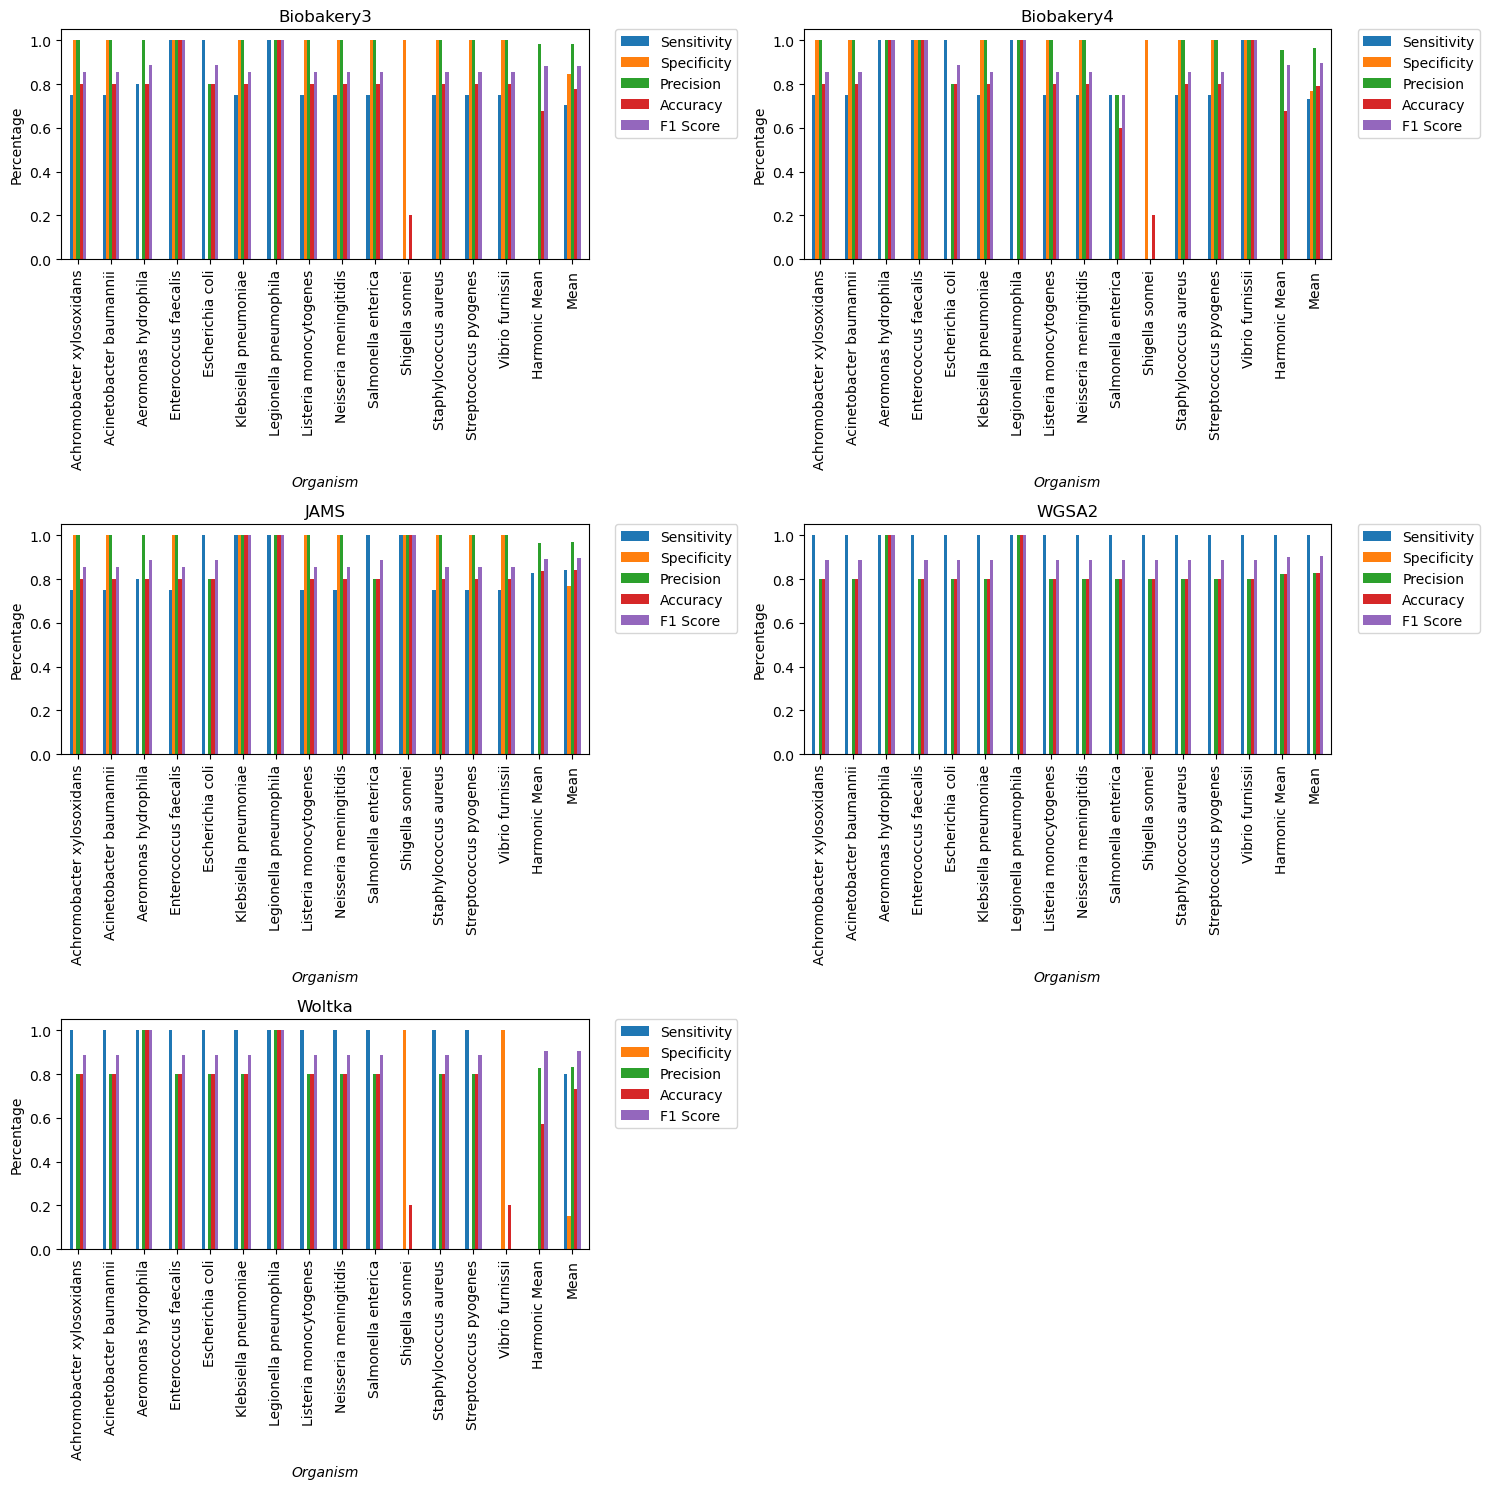

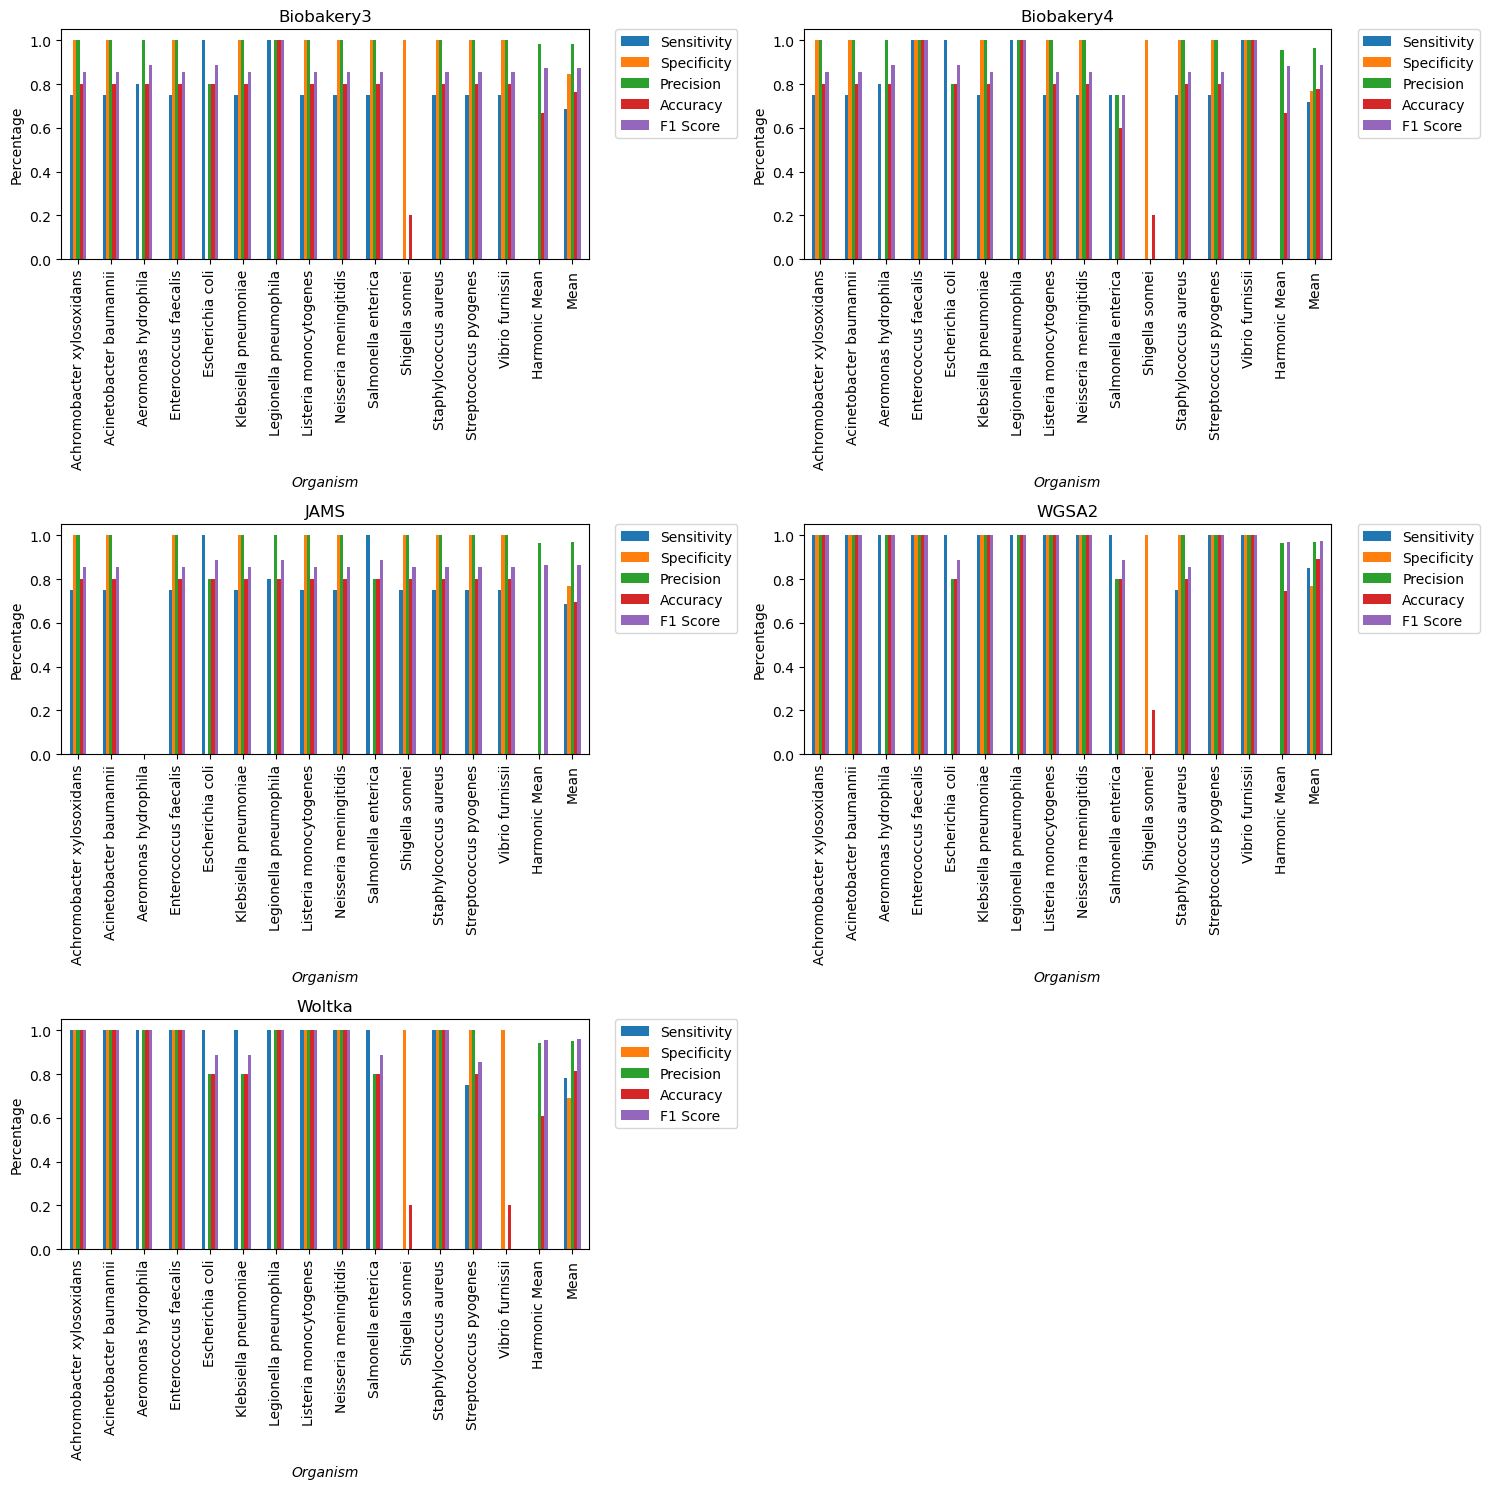

In [4]:



for threshold in df.Filtering.unique():
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    ax = ax.flatten()
    for (i, pipeline) in enumerate(df.Pipeline.unique()):
        if i >= len(ax):
            break

        pipeline_df = df[(df.Pipeline == pipeline) & (df.Filtering == threshold)]
        # Plot x as Organism and Y as wanted_plots
        pipeline_df.plot(x="Organism", y=wanted_plots, kind="bar", ax=ax[i])
        # Remove title, legend from subplots
        ax[i].set_title(f"{pipeline}")
        ax[i].set_xlabel("Organism", fontdict={"fontstyle": "italic"})
        ax[i].set_ylabel("Percentage")
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    fig.delaxes(ax[-1])
    # fig.suptitle(f"Confusion Matrix Metrics for {pipeline} at {threshold:.2%} Threshold")
    fig.tight_layout()
    plt.show()

    fig.savefig(f"confusion_matrix_combined_{threshold:.2%}.pdf", bbox_inches='tight', format="pdf")